**Exercise set 8**
==============


>The goal of this exercise is to gain familiarity with some
>classification methods and the different ways we can assess and compare them.


**Exercise 8.1**


In this exercise, we will consider the
[UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://goo.gl/U2Uwz2).

This data set contains $569$ tumors which have been classified
as malignant or benign. In addition, $30$ variables have been
measured and it is our goal to make a predictive model which
can classify new tumors as being malignant or benign.
An overview of the different variables can be found
on the [`sklearn` website](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset).


**(a)**  Begin the exercise by loading the raw data, and creating a test set.
The data set itself can be loaded directly from `sklearn`
as follows:

```python
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data['data']
# "Rename" y so that 0 = benign and 1 = malignant:
y = [0 if i == 1 else 1 for i in data['target']]
class_names = ['benign', 'malignant']
print('Classes:')
print(class_names)

print('Variables:')
print(data['feature_names'])
```

The test set can be created as in previous exercises by using the method
`train_test_split` which can be found in the module
`sklearn.model_selection`.

Create the test set
using $33$\% of the available data points for the test set.
What is important to consider when creating this test set?
Check that this is indeed satisfied for your test set and
for your training set.




In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

data = load_breast_cancer()
X = data['data']
X = scale(X)
# "Rename" y so that 0 = benign and 1 = malignant:
y = [0 if i else 1 for i in data['target']]
class_names = ['benign', 'malignant']
print('Classes:')
print(class_names)

print('Variables:')
print(data['feature_names'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print("fraction malignant total: {}".format(sum(y)/len(y)))
print("fraction malignant train: {}".format(sum(y_train)/len(y_train)))
print("fraction malignant test: {}".format(sum(y_test)/len(y_test)))

Classes:
['benign', 'malignant']
Variables:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
fraction malignant total: 0.37258347978910367
fraction malignant train: 0.37270341207349084
fraction malignant test: 0.3723404255319149


**Answer to question 8.1(a):** It is important that the train and test set contain roughly the same fraction of malignant datapoint (the feature we want to predict) as the total dat set. To do this we use the `stratify` keyword in `train_test_split()`.

**(b)** In this case, we have to determine what
quantity we are going to use
to compare the different classification methods. Briefly explain
how the following possible metrics for assessing classifiers are
calculated:


* (i)  Accuracy.

* (ii)  Precision.

* (iii)  Recall.

* (iv)  F1.

* (v)  The confusion matrix.



Can you an example of a classification task where false positives
should be avoided and false negative are tolerable? Can you give
an example of the opposite (i.e. where false positives are tolerable
and false negatives should be avoided)?


In the following, we will calculate all these metrics for the
different classification methods we consider. At the end of the
exercise, you will be asked to compare the different classifiers
using these metrics. But before we do that: Which of the
aforementioned metrics would you say is most important for
the classification task we have here?




**Answer to question 8.1(b):** 
In the following section we will use formulas with 
$P$ (number of positive datapoints),
$N$ (number of negative datapoints),
$TP$, (number of correctly classified positive datapoint (true positive))
$FP$, (number of negative datapoints classified as positive (false positive))
$TN$, (number of correctly classified negative datapoint (true negative))
$FN$, (number of positive datapoints classified as negative (false negative))
these are taken from [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

* **Accuracy:** The percentage of correctly classified datapoints (both positive and negative);
  $\frac{TP + TN}{P + N}$ 
  
* **Precision:** Percentage of correctly classified datapoints out of datapoints that are classified as positive; 
  $\frac{TP}{TP + FP}$

* **Recall:** Percentage of correctly classified positive datapoints; 
  $\frac{TP}{P}$

* **F1:** Harmonic mean of both precision and recall; $\frac{2 TP}{TP + FP + P}$ or $\frac{2 TP}{2TP + FP + FN}$

* **The confusion matrix:** 

<table class="wikitable" style="border:none; margin-top:0;">
<tbody><tr>
<th style="background:white; border:none;" colspan="2" rowspan="2">
</th>
<th colspan="3" style="background:none;">Actual class
</th></tr>
<tr>
<th>Positive
</th>
<th>Negative
</th></tr>
<tr>
<th rowspan="3" style="height:6em;"><div style="display: inline-block; -ms-transform: rotate(-90deg); -webkit-transform: rotate(-90deg); transform: rotate(-90deg);;">Predicted<br> class</div>
</th>
<th> Positive
</th>
<td>True Positives
</td>
<td>False Positives
</td></tr>
<tr>
<th>Negative
</th>
<td>False Negatives
</td>
<td>True Negatives
</td></tr>
</tbody></table>

> Can you an example of a classification task where false positives should be avoided and false negative are tolerable? 

For a task where you want to spend a lot of time or money on the positive hits, say for example when trying to find a possible new drug. A false positive hit will cost you a lot.

>Can you give an example of the opposite (i.e. where false positives are tolerable and false negatives should be avoided)?

For example, when trying to predict a risk of breast cancer. You rather have someone be tested extra due to a false positive, than having a delayed diagnosis due to a false negative. The same is true for pregnancy tests.

> Which of the aforementioned metrics would you say is most important for the classification task we have here?

The **recall**, as that will tell us how many of the malignant breast cancer tumors we correctly identified, which is more important than a high accuracy overall.  


**(c)**  Create a $k$-nearest neighbor classifier(This classifier is available from
`sklearn.neighbors.KNeighborsClassifier`) with $3$ neighbors and
fit it using your training set. Evaluate the classifier using the
aforementioned metrics (with the test set) and plot the confusion matrix. (The different metrics are available in the `sklearn.metrics` module. Here, there is also a method, `plot_confusion_matrix` which you
can use for plotting the confusion matrix.)




In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score
import pandas as pd

cms = []
classifier_names = []

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X=X_train, y = y_train)
y_hat = classifier.predict(X_test)
score = recall_score(y_test, y_hat)
print(sum(y_test))
print("Recall score: {}".format(score))

def conf_matrix(y_test, y_hat):
    cm = confusion_matrix(y_test, y_hat)
    index = ['neg', 'pos']
    columns = ['predicted neg', "predicted pos"]
    df = pd.DataFrame(cm, columns=['predicted neg', "predicted pos"], index=['neg', 'pos'])
    
    # Some swapping  and inversing of axis is required to match wikipedia layout
    return df[columns[::-1]].T[index[::-1]]
cm = conf_matrix(y_test, y_hat)
cms.append(cm)
classifier_names.append('Kmeans3')
cm

70
Recall score: 0.8714285714285714


,pos,neg
predicted pos,61,0
predicted neg,9,118


**Answer to question 8.1(c):** It is not great, missing about 12,8% of the positive (malignant) tumors

**(d)**  We will now try to optimize the $k$ for a $k$-nearest neighbor classifier.
This can be done using the method `GridSearchCV` which we used in
exercise set $6$. Use this method to find the "best" value for $k$, and
use the metric you deemed most important in part **(b)** for
scoring what "best" is. Consider $k$ values in the range $1 \leq k \leq 10$
for your search for the best $k$.

Evaluate the classifier with the best $k$ using the
aforementioned metrics (with the test set) and plot the confusion matrix.
What value for $k$ did you find in this case?




In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

scorer = make_scorer(recall_score)
classifier = KNeighborsClassifier()
parameters = [{'n_neighbors': np.arange(1,11,1)}]
grid = GridSearchCV(classifier,
                    param_grid=parameters,
                    scoring=scorer,
                    cv=10,
                    return_train_score=True)
grid.fit(X_train, y_train)
print("Best recall score (train): {}".format(grid.best_score_))
print("Best k: {}".format(grid.best_params_['n_neighbors']))
best = grid.best_estimator_
y_hat = best.predict(X_test)
print("Best recall score (test): {}".format(recall_score(y_test, y_hat)))
conf_matrix(y_test, y_hat)

Best recall score (train): 0.9361904761904762
Best k: 3
Best recall score (test): 0.8714285714285714


,pos,neg
predicted pos,61,0
predicted neg,9,118


**Answer to question 8.1(d):** We already guessed the optimal number of k

**(e)**  Create a decision tree classifier (This classifier is available from
`sklearn.tree.DecisionTreeClassifier`)

and fit it using your training set.
Evaluate the classifier using the
aforementioned metrics (with the test set) and plot the confusion matrix.


In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
print("Tree recall score (test): {}".format(recall_score(y_test, y_hat)))
cm = conf_matrix(y_test, y_hat)
cms.append(cm)
classifier_names.append('Decision Tree (default)')
cm

Tree recall score (test): 0.8142857142857143


,pos,neg
predicted pos,57,5
predicted neg,13,113


**Answer to question 8.1(e):** It performs worse than the k-nearest neighbors classifier.

**(f)**  We will also
try to tune the `DecisionTreeClassifier`
by determining the maximum depth
we should use for the tree. Again, you can use the method
`GridSearchCV` to optimize the parameter
`max_depth` for the `DecisionTreeClassifier`.
Use the metric you deemed most important
in question **(b)** and consider depths
in the range `max_depth = range(1, 21)`, and, in addition,
a depth
where you set `max_depth = None` (this lets the
tree expand as far down as possible).

Evaluate the classifier with the best `max_depth` using the
aforementioned metrics (with the test set) and plot the confusion matrix.

What is the best `max_depth` you find in this case? Is it different
from letting the tree expand as far down as possible and is this as you
would expect?

In [5]:
classifier = DecisionTreeClassifier()
parameters = [{'max_depth':[None]+list(range(1, 21))}]
grid = GridSearchCV(classifier,
                    param_grid=parameters,
                    scoring=scorer,
                    cv=5,
                    return_train_score=True)
grid.fit(X_train, y_train)
print("Best recall score (train): {}".format(grid.best_score_))
print("Best k: {}".format(grid.best_params_['max_depth']))
best = grid.best_estimator_
y_hat = best.predict(X_test)
print("Best recall score (test): {}".format(recall_score(y_test, y_hat)))
cm = conf_matrix(y_test, y_hat)
cms.append(cm)
classifier_names.append('Decision Tree (optimal)')
cm

Best recall score (train): 0.9155172413793105
Best k: 11
Best recall score (test): 0.8142857142857143


,pos,neg
predicted pos,57,5
predicted neg,13,113


**Answer to question 8.1(f):** 11 seems to be the optimal depth of the tree, which is a bit high considering that you need about $2^n$ samples to prevent overfitting ($2^{11} = 2048 > 569$)

**(g)**  In addition to the classifiers we have considered so far,
we will try $3$ alternative classifiers.
For these, we will not try
to optimize any extra parameters.

For each of the following classifiers:


* (i)  Naive Bayes. (Available as `GaussianNB` from `sklearn.naive_bayes`)

* (ii)  LDA. (Available as `LinearDiscriminantAnalysis` from `sklearn.discriminant_analysis`)

* (iii)  Random forest. (Available as `RandomForestClassifier` from `sklearn.ensemble`)



Train the classifier using your training set, and evaluate it using
the aforementioned metrics (with the test set) and plot the confusion matrix.

For the Random forest classifier: Investigate the most important
variables for this classifier. This information is available through the
property `feature_importances_` of your
`RandomForestClassifier` object.

In [6]:
from sklearn.naive_bayes import GaussianNB as GDB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RF
from IPython.core.display import display, HTML

classifiers = [GDB(), LDA(), RF()]
names = ['Naive Bayes', 'LDA', 'Random forest']
dfs = []
for name, classifier in zip(names, classifiers):
    print(name+":")
    classifier.fit(X_train, y_train)
    y_hat = classifier.predict(X_test)
    print("Best recall score (test) for {}: {}".format(name, recall_score(y_test, y_hat)))
    cm = conf_matrix(y_test, y_hat)
    cms.append(cm)
    classifier_names.append(name)
    display(HTML(cm.to_html()))    

Naive Bayes:
Best recall score (test) for Naive Bayes: 0.8571428571428571


,pos,neg
predicted pos,60,2
predicted neg,10,116


LDA:
Best recall score (test) for LDA: 0.9142857142857143


,pos,neg
predicted pos,64,0
predicted neg,6,118


Random forest:
Best recall score (test) for Random forest: 0.9


,pos,neg
predicted pos,63,0
predicted neg,7,118


In [7]:
rf = classifiers[2]
for name, importance in zip(data['feature_names'], rf.feature_importances_):
    if importance > 0.1:
        print("{}: {}".format(name, importance))

mean concave points: 0.12226441721010856
worst perimeter: 0.11652828706761756
worst area: 0.11661518396383144


**Answer to question 8.1(g):** All of these performed better than k-nearest neighbors classification, with LDA doing the best.
From the random forrest we can see that the following features are important:

* mean concave points
* worst perimeter
* worst area

**(h)**  Compare the accuracy, precision, recall and the F1 scores for all
the classifiers you have considered.

If you were to select one
classifier to put into real-life use, which one would you choose and why?




In [8]:
def accuracy(cm):
    acc = cm['pos']['predicted pos'] + cm['neg']['predicted neg']
    acc /= sum(cm['pos'])+sum(cm['neg'])
    return acc

def precision(cm):
    cm = cm.T
    prec = cm['predicted pos']['pos'] / sum(cm['predicted pos'])
    return prec

def recall(cm):
    rec = cm['pos']['predicted pos']
    rec /= sum(cm['pos'])
    return rec

def f1(cm):
    tp = cm['pos']['predicted pos']
    fp = cm['neg']['predicted pos']
    fn = cm['pos']['predicted neg']
    return 2*tp/(2*tp+fp+fn)
    

for cm, name  in zip(cms, classifier_names):
    print('\n'+name)
    print("accuracy: {}".format(accuracy(cm)))
    print("precision: {}".format(precision(cm)))
    print("recall: {}".format(recall(cm)))
    print("F1: {}".format(f1(cm)))


Kmeans3
accuracy: 0.9521276595744681
precision: 1.0
recall: 0.8714285714285714
F1: 0.9312977099236641

Decision Tree (default)
accuracy: 0.9042553191489362
precision: 0.9193548387096774
recall: 0.8142857142857143
F1: 0.8636363636363636

Decision Tree (optimal)
accuracy: 0.9042553191489362
precision: 0.9193548387096774
recall: 0.8142857142857143
F1: 0.8636363636363636

Naive Bayes
accuracy: 0.9361702127659575
precision: 0.967741935483871
recall: 0.8571428571428571
F1: 0.9090909090909091

LDA
accuracy: 0.9680851063829787
precision: 1.0
recall: 0.9142857142857143
F1: 0.9552238805970149

Random forest
accuracy: 0.9627659574468085
precision: 1.0
recall: 0.9
F1: 0.9473684210526315


**Answer to question 8.1(h):** LDA as that one has the best scores in accuracy, recall, precision, and F1

**(i)**  Two extra tasks for the curious student:

* (i)  Visualize the decision tree you have created. This
can be done by using the method `export_graphviz`
from `sklearn.tree`, or the method `plot_tree`
from `sklearn.tree`. (Please
see https://scikit-learn.org/stable/modules/tree.html and https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html )


* (ii)  Create an additional classifier using a support vector machine. This is
available via `SVC` from `sklearn.svm`.




<IPython.core.display.Javascript object>


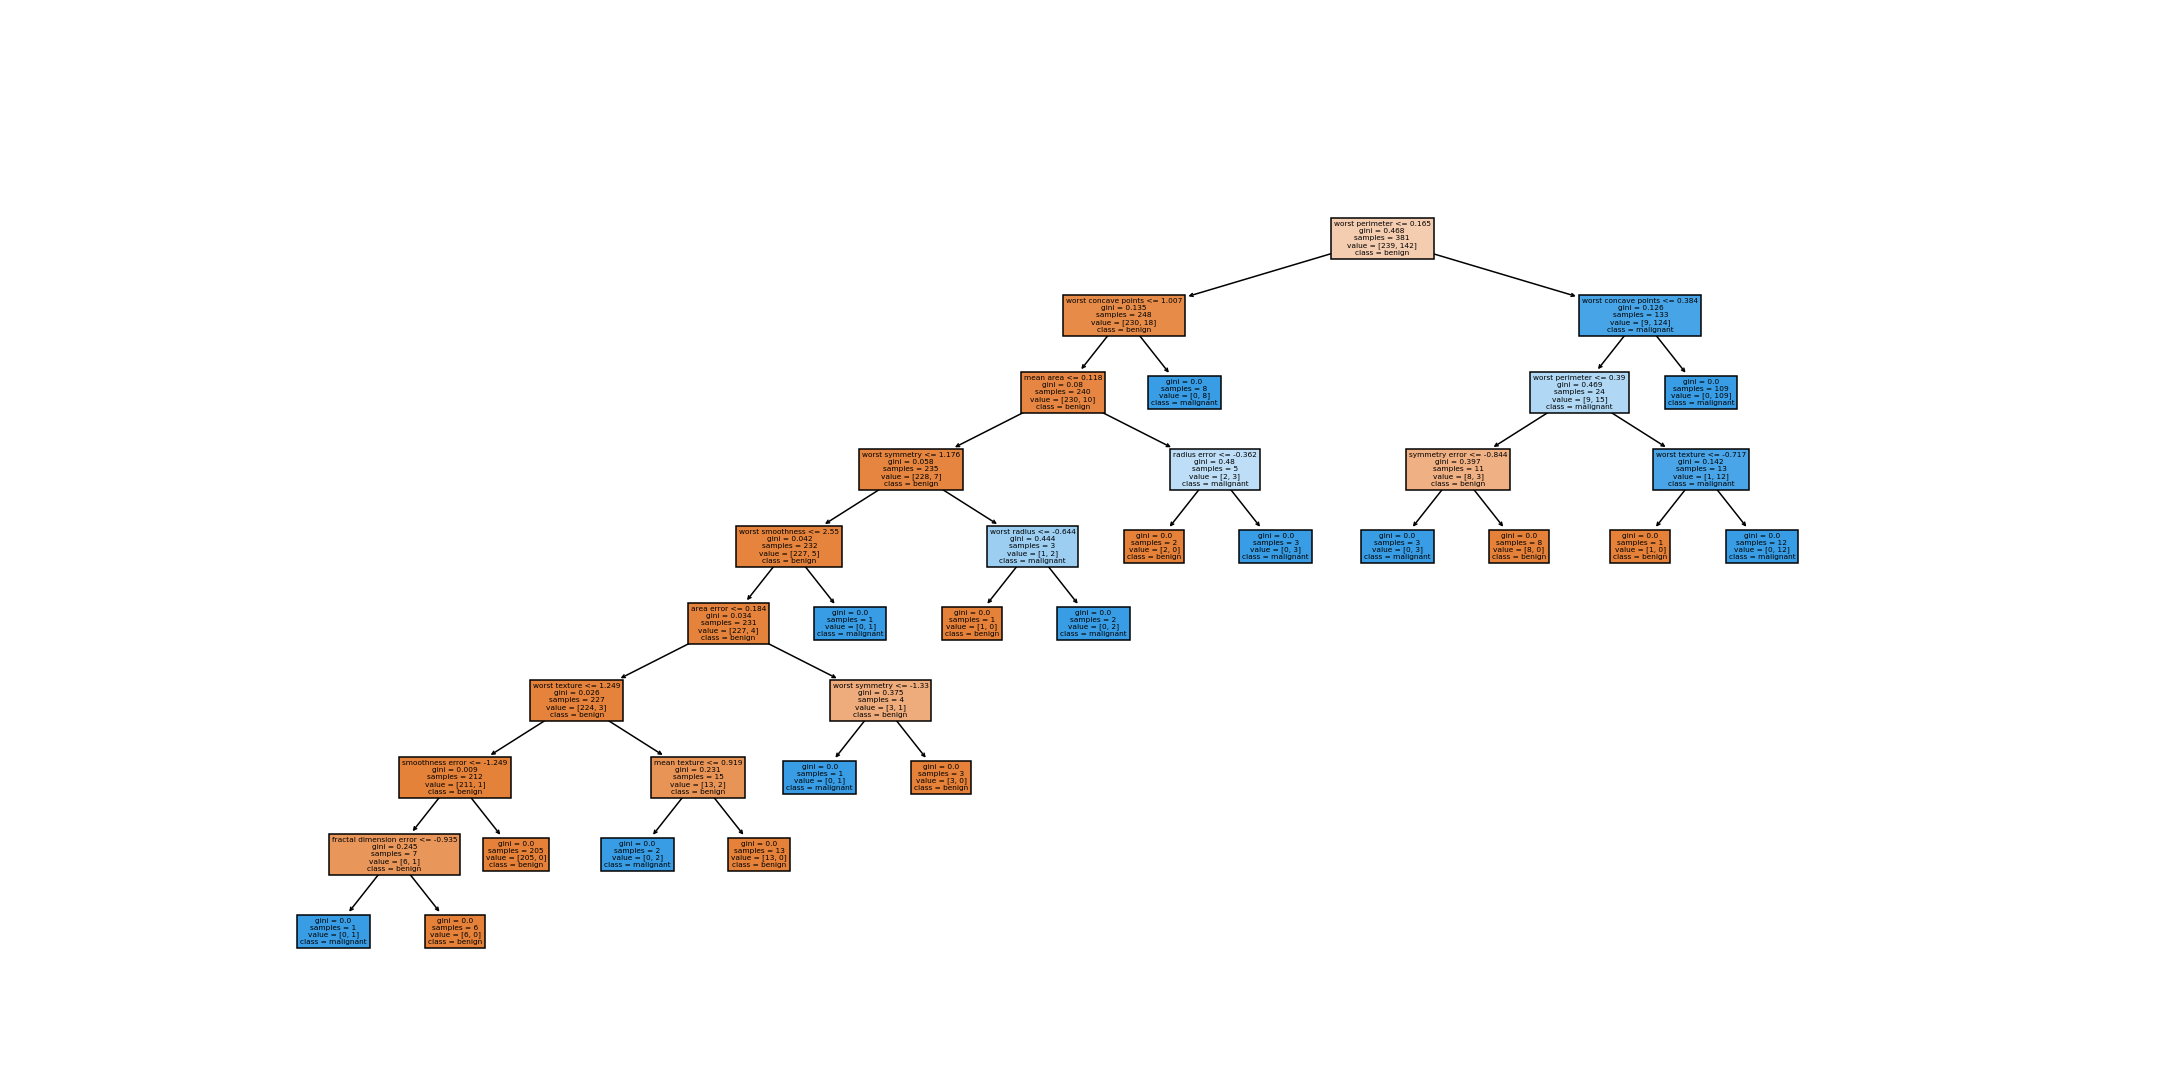

In [9]:
%matplotlib notebook
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(20,10)) 
plot_tree(tree, feature_names=data['feature_names'], filled=True, class_names=['benign', 'malignant']);

In [10]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_hat = svc.predict(X_test)
cm = conf_matrix(y_test, y_hat)
print("accuracy: {}".format(accuracy(cm)))
print("precision: {}".format(precision(cm)))
print("recall: {}".format(recall(cm)))
print("F1: {}".format(f1(cm)))
cm

accuracy: 0.9574468085106383
precision: 1.0
recall: 0.8857142857142857
F1: 0.9393939393939394


,pos,neg
predicted pos,62,0
predicted neg,8,118
